Features_Engineering_Techniques_for_Time_Series

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Take a list as input to your DataFrame 
List = [[1, 2, 3], [4, 5, 6]]
df = pd.DataFrame(List, index=range(0,2),  columns=['A', 'B', 'C'])
df

,A,B,C
0,1,2,3
1,4,5,6


In [3]:
# Take a dictionary as input to your DataFrame 
Dict = {"A": ['1', '300'], "B": ['1', '2'], "C": ['2', '4']}
df = pd.DataFrame(Dict)
df

,A,B,C
0,1,1,2
1,300,2,4


In [4]:
df.index
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [5]:
List = [[1, 2], [3, 4], [5, 6]]
df = pd.DataFrame(List, index=['A', 'B', 'C'],  columns=["Ali","Omar"])
df

,Ali,Omar
A,1,2
B,3,4
C,5,6


In [6]:
# Using `iloc[]`
print(df.iloc[0,:])
 
# Using `loc[]`
print(df.loc["A",:])

Ali     1
Omar    2
Name: A, dtype: int64
Ali     1
Omar    2
Name: A, dtype: int64


In [7]:
# Using `iloc[]`
print(df.iloc[:,0])
 
# Using `loc[]`
print(df.loc[:,"Ali"])

A    1
B    3
C    5
Name: Ali, dtype: int64
A    1
B    3
C    5
Name: Ali, dtype: int64


In [8]:
# Create a new dataframe
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=["ID", "Team", "Mark"])

# Set index using ID column
df.set_index("ID")

# Set index using Numpy array
array = np.array([1,8,3])
df.set_index(array)

,ID,Team,Mark
1,1,2,3
8,4,5,6
3,7,8,9


In [9]:
df.reset_index()

,index,ID,Team,Mark
0,0,1,2,3
1,1,4,5,6
2,2,7,8,9


In [10]:
# This will make an index labeled `2` and add the new values
df.loc[10] = [14, 15, 16]

In [11]:
df.loc[:, "Perfor"] = [1,2,3,4]

In [13]:
# Drop the column at position 1
df.drop(df.columns[[1]], axis=1)

,ID,Mark,Perfor
0,1,3,1
1,4,6,2
2,7,9,3
10,14,16,4


In [14]:
# Drop the row at position 1
df.drop(df.index[1], axis=0, inplace=True)

In [18]:
# Parse the indext of the data 
pd.read_csv('/content/drive/MyDrive/Dataset.csv', parse_dates=True)

,Datetime,Electricity
0,2017-04-01 00:00:00,1081834.450
1,2017-04-01 01:00:00,1059999.368
2,2017-04-01 02:00:00,1037776.432
3,2017-04-01 03:00:00,1023418.608
4,2017-04-01 04:00:00,1017838.768
...,...,...
95,2017-04-04 23:00:00,1128693.905
96,2017-04-05 00:00:00,1098477.769
97,2017-04-05 01:00:00,1074217.684
98,2017-04-05 02:00:00,1052578.838


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Techniques Feature Engineering

In [21]:
# Load electricity consumption data
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv',parse_dates=['Datetime'])


df['Year']=df['Datetime'].dt.year 
df['Month']=df['Datetime'].dt.month 
df['DayOfWeek']=df['Datetime'].dt.dayofweek  

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv',parse_dates=['Datetime'])

df['Hour'] = df['Datetime'].dt.hour 
df['Minute'] = df['Datetime'].dt.minute 
df['Second'] = df['Datetime'].dt.second 

In [23]:
# Load electricity consumption data
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv',parse_dates=['Datetime'])

df['lag_1'] = df['Electricity'].shift(1)
df = df[['Datetime', 'lag_1', 'Electricity']]

In [24]:
# Load electricity consumption data
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv',parse_dates=['Datetime'])

df['lag_1'] = df['Electricity'].shift(1)
df['lag_2'] = df['Electricity'].shift(2)
df['lag_3'] = df['Electricity'].shift(3)
df['lag_4'] = df['Electricity'].shift(4)
df['lag_5'] = df['Electricity'].shift(5)
df['lag_6'] = df['Electricity'].shift(6)
df['lag_7'] = df['Electricity'].shift(7)

df = df[['Datetime', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'Electricity']]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


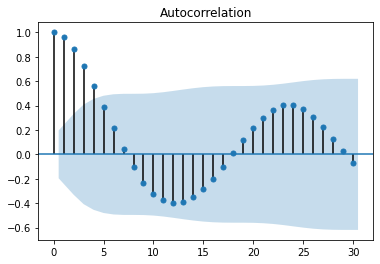

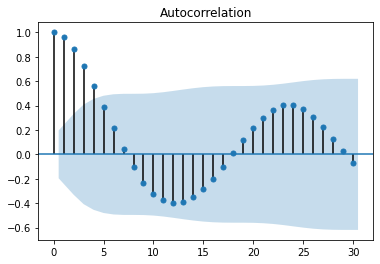

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

# Load electricity consumption data
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv',parse_dates=['Datetime'])

plot_acf(df['Electricity'], lags=30)

In [26]:
# Load electricity consumption data
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv',parse_dates=['Datetime'])


df['rolling_mean'] = df['Electricity'].rolling(window=3).mean()
df = df[['Datetime', 'rolling_mean', 'Electricity']]

In [27]:
# Load electricity consumption data
df = pd.read_csv('/content/drive/MyDrive/Dataset.csv',parse_dates=['Datetime'])

df['expanding_mean'] = df['Electricity'].expanding(3).mean()
df = df[['Datetime', 'expanding_mean' ,'Electricity']]